# Optimization Tutorial

## Introduction

This a tutorial introducing different optimization functions in a methodical way, where we proceed from one optimization technique to another, such that the new optmization method overcomes a limitation in the previous optimization technique. A thorough explanation is available at (http://www.thushv.com/deep-learning/a-practical-guide-to-understanding-stochastic-optimization-methods-workhorse-of-machine-learning)



In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as pylab
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import math

## Plotting Function

In [3]:
def plot_line_with_optimize_steps(x,y,opt_points_x, opt_points_y,fname_to_save, title, annotate=True):
    epsilon = 1.0
    epsilon_x = 0.01
    
    max_alpha = 1.0
    min_alpha = 0.2
    
    n_steps = len(opt_points_x)
    
    pylab.plot(x,y)
    pylab.xlabel(r'$\theta$',fontsize=18)
    pylab.ylabel(r'$y$',fontsize=18)
    pylab.title(title,fontsize=18)
    
    for idx, (p_x, p_y) in enumerate(zip(opt_points_x, opt_points_y)):        
        alpha = min_alpha + idx*(max_alpha - min_alpha) / n_steps
        pylab.scatter(p_x, p_y,color='r', alpha=alpha)
        if annotate:
            pylab.annotate('t='+str(idx),xy=(0,0), xytext=(p_x,p_y+1),fontsize=18)    
    
    #pylab.savefig(fname_to_save)
    pylab.show()
    
    
    

## Defining Variables and Function for Optimization

In [4]:
session = None, 
tf_x, tf_y = None, None
tf_x_ph, tf_y_ph = None, None

def setup_problem_2d():
    global session, tf_x, tf_y, tf_x_ph, tf_y_ph
    
    tf.reset_default_graph()
    session = tf.InteractiveSession()

    tf_x_ph = tf.placeholder(shape=[100], dtype=tf.float32, name='x_placeholder')

    with tf.variable_scope('opt'):
        tf_x = tf.get_variable('x',initializer=tf.constant(-5.0, shape=None, dtype=tf.float32))

    tf_y = tf_x ** 2
    tf_y_ph = tf_x_ph ** 2


## SGD Optimizer

X:  -4.0  => Y:  16.0
X:  -3.2  => Y:  10.24
X:  -2.56  => Y:  6.5536


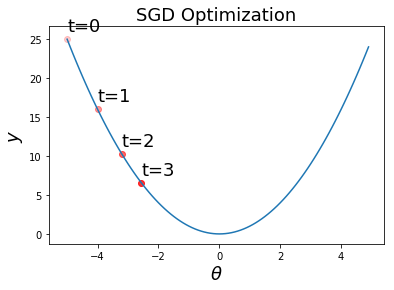

In [407]:
# Reset Graph
setup_problem_2d()

tf_optimize_y = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(tf_y)
session.run(tf.global_variables_initializer())

opt_points_x, opt_points_y = [],[]
opt_points_x.append(-5.0)
opt_points_y.append(25.0)
for step in range(3):
    session.run(tf_optimize_y)
    x, y = session.run([tf_x, tf_y])    
    opt_points_x.append(x)
    opt_points_y.append(y)
    print('X: ',x,' => Y: ',y)
        
range_x = np.arange(-5.0,5.0,0.1)
range_y = session.run(tf_y_ph,feed_dict={tf_x_ph:range_x})

plot_line_with_optimize_steps(range_x,range_y,np.asarray(opt_points_x),np.asarray(opt_points_y),'sgd.png','SGD Optimization')

## Momentum Optimizer

X:  -4.0  => Y:  16.0
X:  -2.3  => Y:  5.29
X:  -0.31  => Y:  0.0961


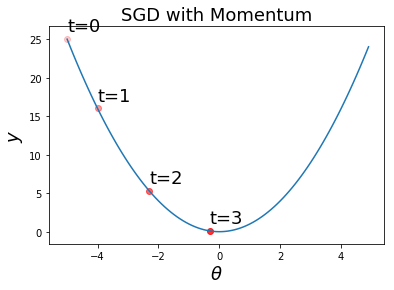

In [408]:
setup_problem_2d()

tf_optimize_y = tf.train.MomentumOptimizer(learning_rate=0.1, momentum=0.9).minimize(tf_y)

with tf.variable_scope('opt',reuse=True):
    tf_reinit_x = tf.assign(tf.get_variable('x'),-5.0)
    session.run(tf_reinit_x)
    session.run(tf.global_variables_initializer())

opt_points_x, opt_points_y = [],[]
opt_points_x.append(-5.0)
opt_points_y.append(25.0)
for step in range(3):
    
    session.run(tf_optimize_y)
    x, y = session.run([tf_x, tf_y])    
    opt_points_x.append(x)
    opt_points_y.append(y)
    print('X: ',x,' => Y: ',y)

range_x = np.arange(-5.0,5.0,0.1)
range_y = session.run(tf_y_ph,feed_dict={tf_x_ph:range_x})

plot_line_with_optimize_steps(range_x,range_y,np.asarray(opt_points_x),np.asarray(opt_points_y),'momentum_sgd.png','SGD with Momentum')

## Problem with the Momentum Optimizer

X:  -4.0  => Y:  16.0
X:  -2.3  => Y:  5.29
X:  -0.31  => Y:  0.0961
X:  1.543  => Y:  2.38085
X:  2.9021  => Y:  8.42218
X:  3.54487  => Y:  12.5661
X:  3.41439  => Y:  11.658
X:  2.61408  => Y:  6.8334
X:  1.37098  => Y:  1.87959
X:  -0.0219995  => Y:  0.000483977


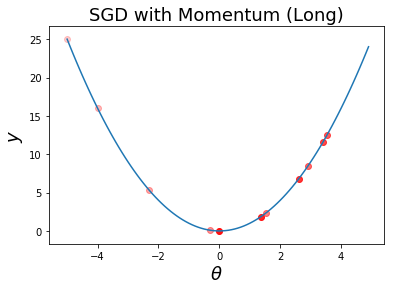

In [411]:
setup_problem_2d()

tf_optimize_y = tf.train.MomentumOptimizer(learning_rate=0.1, momentum=0.9).minimize(tf_y)

with tf.variable_scope('opt',reuse=True):
    tf_reinit_x = tf.assign(tf.get_variable('x'),-5.0)
    session.run(tf_reinit_x)
    session.run(tf.global_variables_initializer())
    
opt_points_x, opt_points_y = [],[]
opt_points_x.append(-5.0)
opt_points_y.append(25.0)

for step in range(10):
    
    session.run(tf_optimize_y)
    x, y = session.run([tf_x, tf_y])  
    opt_points_x.append(x)
    opt_points_y.append(y)
    print('X: ',x,' => Y: ',y)
    
range_x = np.arange(-5.0,5.0,0.1)
range_y = session.run(tf_y_ph,feed_dict={tf_x_ph:range_x})

plot_line_with_optimize_steps(range_x,range_y,np.asarray(opt_points_x),np.asarray(opt_points_y),
                              'sgd_momentum_longer.png','SGD with Momentum (Long)', False)

## Nestrov's Accelerated Gradient: Look Ahead Before Taking a Step

X:  -3.1  => Y:  9.61
X:  -1.112  => Y:  1.23654
X:  0.54176  => Y:  0.293504
X:  1.62411  => Y:  2.63775
X:  2.07859  => Y:  4.32053
X:  1.99009  => Y:  3.96046
X:  1.52835  => Y:  2.33587
X:  0.890233  => Y:  0.792516
X:  0.25274  => Y:  0.0638774
X:  -0.256804  => Y:  0.0659481


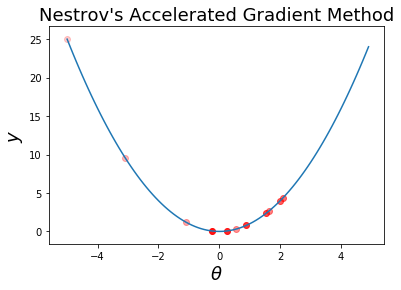

In [412]:
setup_problem_2d()

tf_optimize_y = tf.train.MomentumOptimizer(learning_rate=0.1, momentum=0.9, use_nesterov=True).minimize(tf_y)

with tf.variable_scope('opt',reuse=True):
    tf_reinit_x = tf.assign(tf.get_variable('x'),-5.0)
    session.run(tf_reinit_x)
    session.run(tf.global_variables_initializer())

opt_points_x, opt_points_y = [],[]
opt_points_x.append(-5.0)
opt_points_y.append(25.0)
for step in range(10):
    
    session.run(tf_optimize_y)
    x, y = session.run([tf_x, tf_y])    
    opt_points_x.append(x)
    opt_points_y.append(y)
    print('X: ',x,' => Y: ',y)

range_x = np.arange(-5.0,5.0,0.1)
range_y = session.run(tf_y_ph,feed_dict={tf_x_ph:range_x})

plot_line_with_optimize_steps(range_x,range_y,np.asarray(opt_points_x),np.asarray(opt_points_y),
                             'nestrov.png','Nestrov\'s Accelerated Gradient Method', False)

## AdaGrad: Learning rate for each Parameter

In [48]:
sigma_1 = 1.5
sigma_2 = 2.0
mu_1 = 0.5
mu_2 = 0.0

tf_x, tf_y, tf_x_ph, tf_y_ph, tf_z = None, None, None, None, None
tf_reinit_x, tf_reinit_y = None, None
session = None

def setup_problem_3d(start_x, start_y):
    global session
    global tf_x, tf_y, tf_x_ph, tf_y_ph, tf_z
    global tf_reinit_x, tf_reinit_y
    
    tf.reset_default_graph()
    session = tf.InteractiveSession()

    tf_x_ph = tf.placeholder(shape=[100], dtype=tf.float32, name='x_placeholder')
    tf_y_ph = tf.placeholder(shape=[100], dtype=tf.float32, name='x_placeholder')

    with tf.variable_scope('opt'):
        tf_x = tf.get_variable('x',initializer=tf.constant(start_x, shape=None, dtype=tf.float32))
        tf_y = tf.get_variable('y',initializer=tf.constant(start_y, shape=None, dtype=tf.float32))
    with tf.variable_scope('opt',reuse=True):
        tf_reinit_x = tf.assign(tf.get_variable('x'),start_x)
        tf_reinit_y = tf.assign(tf.get_variable('y'),start_y)

    tf_z = (1.0/np.sqrt((2*math.pi*sigma_1**2)**2))*\
    (tf.exp(-(
        (tf_x-mu_1)**2/(sigma_1/2.0)**2 + (tf_y-mu_1)**2/sigma_1**2)
           )) - \
    (1.0/np.sqrt((2*math.pi*sigma_2**2)**2))*(tf.exp(-((tf_x-mu_2)**2 + (tf_y-mu_2)**2)/sigma_2**2))

    # make it curved towards ends
    tf_z += 0.001*(tf_x**2 + tf_x*tf_y + tf_y**2)

def get_z(X,Y):
    Z = (1.0/np.sqrt((2*math.pi*sigma_1**2)**2))*\
     (np.exp(-(
         (X-mu_1)**2/(sigma_1/2.0)**2 + (Y-mu_1)**2/sigma_1**2)
            )) - \
(1.0/np.sqrt((2*math.pi*sigma_2**2)**2))*(np.exp(-((X-mu_2)**2 + (Y-mu_2)**2)/sigma_2**2)) + \
0.001*(X**2 + X*Y + Y**2)
    return Z

## Plotting the 3D Surface

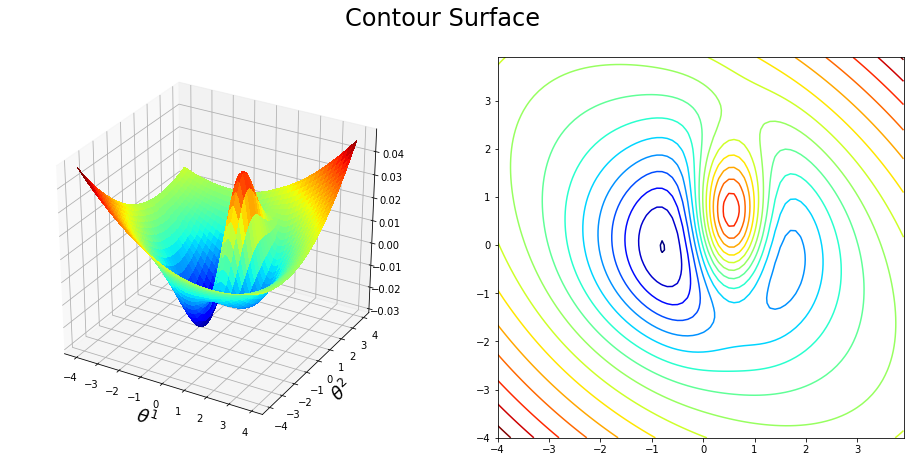

In [99]:
range_x,range_y = np.arange(-4.0,4.0,0.5), np.arange(-4.0,4.0,0.5)
X_lowres, Y_lowres = np.meshgrid(range_x, range_y)
Z_lowres = get_z(X_lowres,Y_lowres)

range_x,range_y = np.arange(-4.0,4.0,0.1), np.arange(-4.0,4.0,0.1)
X_hires, Y_hires = np.meshgrid(range_x, range_y)
Z_hires = get_z(X_hires,Y_hires)

pylab.clf()
fig = pylab.figure(figsize=(16, 7))
ax1 = fig.add_subplot(121,projection='3d')
ax1.plot_surface(X_hires, Y_hires, Z_hires, linewidth=1, cmap=cm.jet,
               antialiased=False)
ax1.set_xlabel(r'$\theta^1$',fontsize=18)
ax1.set_ylabel(r'$\theta^2$',fontsize=18)

ax2 = fig.add_subplot(122)
ax2.contour(X_hires, Y_hires, Z_hires, 16,  cmap=cm.jet)

pylab.suptitle('Contour Surface',fontsize=24)
pylab.savefig('3d_surface.png')
pylab.show()

## Plotting AdaGrad vs NAG

In [88]:
start_x, start_y = 0.6,0.55
num_steps = 25

setup_problem_3d(start_x,start_y)

tf_ada_optimize_z = tf.train.AdagradOptimizer(learning_rate=1.0).minimize(tf_z)
tf_mom_optimize_z = tf.train.MomentumOptimizer(learning_rate=0.5, momentum=0.9, use_nesterov=True).minimize(tf_z)

with tf.variable_scope('opt',reuse=True):
    session.run([tf_reinit_x, tf_reinit_y])
    session.run(tf.global_variables_initializer())

opt_ada_points_x, opt_ada_points_y, opt_ada_points_z = [],[],[]
opt_ada_points_x.append(start_x)
opt_ada_points_y.append(start_y)
opt_ada_points_z.append(get_z(start_x,start_y))

print('Adagrad Optimization')
for step in range(num_steps):
    session.run(tf_ada_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_ada_points_x.append(x)
    opt_ada_points_y.append(y)
    opt_ada_points_z.append(z)
    print('X:',x,', Y:',y,'=> Z:',z)

session.run([tf_reinit_x, tf_reinit_y])

opt_mom_points_x, opt_mom_points_y, opt_mom_points_z = [],[],[]
opt_mom_points_x.append(start_x)
opt_mom_points_y.append(start_y)
opt_mom_points_z.append(get_z(start_x,start_y))

print('Momentum Optimization')
for step in range(num_steps):
    session.run(tf_mom_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_mom_points_x.append(x)
    opt_mom_points_y.append(y)
    opt_mom_points_z.append(z)
    print('theta1:',x,', theta2:',y,'=> Z:',z)



Adagrad Optimization
X: 0.640492 , Y: 0.525068 => Z: 0.035781
X: 0.708476 , Y: 0.496725 => Z: 0.0335792
X: 0.817931 , Y: 0.464864 => Z: 0.0284436
X: 0.977633 , Y: 0.430127 => Z: 0.0186952
X: 1.1686 , Y: 0.394815 => Z: 0.00657862
X: 1.33902 , Y: 0.362339 => Z: -0.00211827
X: 1.45888 , Y: 0.334053 => Z: -0.00637294
X: 1.53774 , Y: 0.309058 => Z: -0.00831524
X: 1.59077 , Y: 0.286312 => Z: -0.00927834
X: 1.62766 , Y: 0.265164 => Z: -0.00981069
X: 1.65405 , Y: 0.245224 => Z: -0.0101374
X: 1.67328 , Y: 0.226249 => Z: -0.010358
X: 1.68746 , Y: 0.208078 => Z: -0.0105202
X: 1.69799 , Y: 0.1906 => Z: -0.0106483
X: 1.7058 , Y: 0.173734 => Z: -0.0107552
X: 1.71157 , Y: 0.157418 => Z: -0.0108483
X: 1.71578 , Y: 0.141605 => Z: -0.0109317
X: 1.7188 , Y: 0.126259 => Z: -0.0110082
X: 1.72087 , Y: 0.111347 => Z: -0.0110791
X: 1.72222 , Y: 0.0968459 => Z: -0.0111456
X: 1.723 , Y: 0.0827335 => Z: -0.0112082
X: 1.72333 , Y: 0.0689918 => Z: -0.0112675
X: 1.72331 , Y: 0.055605 => Z: -0.0113238
X: 1.72301 , Y

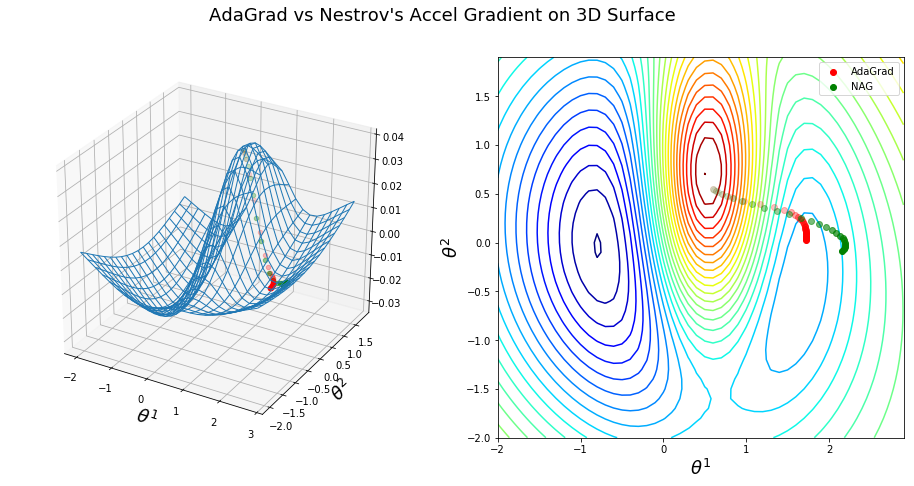

In [92]:
pylab.clf()
fig = pylab.figure(figsize=(16, 7))
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)

ax1.plot_wireframe(X_lowres, Y_lowres, Z_lowres, linewidth=1)
ax2.contour(X_hires, Y_hires, Z_hires, 32,  zorder=1, cmap=cm.jet)
#ax1.plot_surface(X_hires, Y_hires, Z_hires, linewidth=1, cmap=cm.jet, antialiased=False)

for idx, (x,y,z) in enumerate(zip(opt_ada_points_x, opt_ada_points_y, opt_ada_points_z)):
    if idx != len(opt_ada_points_x)-1:
        ax1.scatter(x,y,z , color='r', alpha=max(0.1,idx*1.0/num_steps))
        ax2.scatter(x,y , color='r', alpha=max(0.1,idx*1.0/num_steps))
    else:
        ax1.scatter(x,y,z , color='r', alpha=max(0.1,idx*1.0/num_steps), label='AdaGrad')
        ax2.scatter(x,y , color='r', alpha=max(0.1,idx*1.0/num_steps), label='AdaGrad')
for idx, (x,y,z) in enumerate(zip(opt_mom_points_x, opt_mom_points_y, opt_mom_points_z)):
    if idx != len(opt_mom_points_x)-1:
        ax1.scatter(x,y,z , color='g', alpha=max(0.1,idx*1.0/num_steps))
        ax2.scatter(x,y , color='g', alpha=max(0.1,idx*1.0/num_steps))
    else:
        ax1.scatter(x,y,z , color='g', alpha=max(0.1,idx*1.0/num_steps), label='NAG')
        ax2.scatter(x,y , color='g', alpha=max(0.1,idx*1.0/num_steps), label='NAG')

ax1.set_xlabel(r'$\theta^1$',fontsize=18)
ax1.set_ylabel(r'$\theta^2$',fontsize=18)
ax2.set_xlabel(r'$\theta^1$',fontsize=18)
ax2.set_ylabel(r'$\theta^2$',fontsize=18)
ax2.legend()
pylab.suptitle('AdaGrad vs Nestrov\'s Accel Gradient on 3D Surface',fontsize=18)

pylab.savefig('AdaGrad_3d.png')
pylab.show()

## Adam Optimizer: Why not both learning rate and momentum for each parameter

In [96]:
start_x, start_y = 0.6,0.55
num_steps = 25

setup_problem_3d(start_x,start_y)

tf_ada_optimize_z = tf.train.AdagradOptimizer(learning_rate=0.1).minimize(tf_z)
tf_adam_optimize_z = tf.train.AdamOptimizer(learning_rate=0.1).minimize(tf_z)

session.run(tf.global_variables_initializer())
session.run([tf_reinit_x, tf_reinit_y])

opt_ada_points_x, opt_ada_points_y, opt_ada_points_z = [],[],[]
opt_ada_points_x.append(start_x)
opt_ada_points_y.append(start_y)
opt_ada_points_z.append(get_z(start_x,start_y))


print('Adagrad Optimization')
for step in range(10):
    session.run(tf_ada_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_ada_points_x.append(x)
    opt_ada_points_y.append(y)
    opt_ada_points_z.append(z)
    print('X:',x,', Y:',y,'=> Z:',z)

session.run([tf_reinit_x, tf_reinit_y])

opt_adam_points_x, opt_adam_points_y, opt_adam_points_z = [],[],[]
opt_adam_points_x.append(start_x)
opt_adam_points_y.append(start_y)
opt_adam_points_z.append(get_z(start_x,start_y))

print('Adam Optimization')
for step in range(10):
    session.run(tf_adam_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_adam_points_x.append(x)
    opt_adam_points_y.append(y)
    opt_adam_points_z.append(z)
    print('X:',x,', Y:',y,'=> Z:',z)

    
range_x,range_y = np.arange(-2.0,3.0,0.25), np.arange(-2.0,2.0,0.25)
X_lowres, Y_lowres = np.meshgrid(range_x, range_y)
Z_lowres = get_z(X_lowres,Y_lowres)


Adagrad Optimization
X: 0.604049 , Y: 0.547507 => Z: 0.0366154
X: 0.608377 , Y: 0.54498 => Z: 0.0365336
X: 0.613002 , Y: 0.542418 => Z: 0.0364426
X: 0.617939 , Y: 0.539822 => Z: 0.036341
X: 0.623208 , Y: 0.537192 => Z: 0.0362277
X: 0.628826 , Y: 0.534526 => Z: 0.0361011
X: 0.634813 , Y: 0.531826 => Z: 0.0359597
X: 0.641186 , Y: 0.52909 => Z: 0.0358017
X: 0.647963 , Y: 0.526319 => Z: 0.0356252
X: 0.655163 , Y: 0.523512 => Z: 0.0354281
Adam Optimization
X: 0.699998 , Y: 0.450004 => Z: 0.033351
X: 0.793529 , Y: 0.351054 => Z: 0.028164
X: 0.887966 , Y: 0.252092 => Z: 0.0215906
X: 0.984092 , Y: 0.152537 => Z: 0.0142879
X: 1.08191 , Y: 0.0522572 => Z: 0.00699662
X: 1.18093 , Y: -0.0484037 => Z: 0.000419317
X: 1.28012 , Y: -0.148572 => Z: -0.00491157
X: 1.37792 , Y: -0.246835 => Z: -0.00873368
X: 1.47234 , Y: -0.341375 => Z: -0.0110785
X: 1.56129 , Y: -0.43026 => Z: -0.0122018


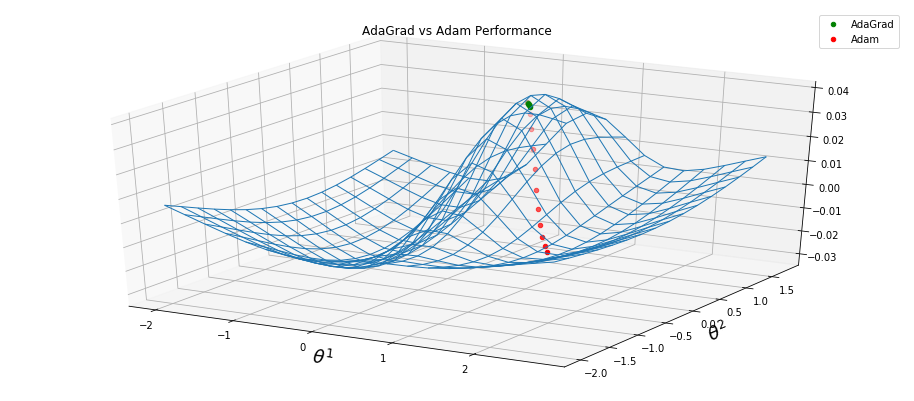

In [97]:
pylab.clf()
fig = pylab.figure(figsize=(16, 7))
ax1 = fig.add_subplot(111,projection='3d')

ax1.plot_wireframe(X_lowres, Y_lowres, Z_lowres, linewidth=1)
for idx, (x,y,z) in enumerate(zip(opt_ada_points_x, opt_ada_points_y, opt_ada_points_z)):
    if idx != len(opt_ada_points_x)-1:
        ax1.scatter(x,y,z , color='g', alpha=(idx+2)/12.0)
    else:
        ax1.scatter(x,y,z , color='g', alpha=(idx+2)/12.0, label='AdaGrad')
for idx, (x,y,z) in enumerate(zip(opt_adam_points_x, opt_adam_points_y, opt_adam_points_z)):
    if idx != len(opt_adam_points_x)-1:
        ax1.scatter(x,y,z , color='r', alpha=(idx+2)/12.0)
    else:
        ax1.scatter(x,y,z , color='r', alpha=(idx+2)/12.0, label='Adam')

ax1.set_xlabel(r'$\theta^1$',fontsize=18)
ax1.set_ylabel(r'$\theta^2$',fontsize=18)

pylab.title('AdaGrad vs Adam Performance')
pylab.legend()

pylab.savefig('AdaGradvsAdam_3d.png')
pylab.show()

## All algorithms at once

In [78]:
start_x, start_y = 0.6,0.55
n_steps =50
setup_problem_3d(start_x,start_y)

with tf.variable_scope('sgd'):
    tf_optimize_z = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(tf_z)
with tf.variable_scope('momentum'):
    tf_mom_optimize_z = tf.train.MomentumOptimizer(learning_rate=0.05, momentum=0.9, use_nesterov=True).minimize(tf_z)
with tf.variable_scope('adagrad'):
    tf_ada_optimize_z = tf.train.AdagradOptimizer(learning_rate=0.05).minimize(tf_z)
with tf.variable_scope('rmsprop'):
    tf_rms_optimize_z = tf.train.RMSPropOptimizer(learning_rate=0.05).minimize(tf_z)
with tf.variable_scope('adam'):
    tf_adam_optimize_z = tf.train.AdamOptimizer(learning_rate=0.05).minimize(tf_z)
    
    
session.run(tf.global_variables_initializer())

session.run([tf_reinit_x, tf_reinit_y])

opt_sgd_points_x, opt_sgd_points_y, opt_sgd_points_z = [],[],[]
opt_sgd_points_x.append(start_x)
opt_sgd_points_y.append(start_y)
opt_sgd_points_z.append(get_z(start_x,start_y))


print('SGD Optimization')
for step in range(n_steps):
    session.run(tf_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_sgd_points_x.append(x)
    opt_sgd_points_y.append(y)
    opt_sgd_points_z.append(z)


session.run([tf_reinit_x, tf_reinit_y])

opt_mom_points_x, opt_mom_points_y, opt_mom_points_z = [],[],[]
opt_mom_points_x.append(start_x)
opt_mom_points_y.append(start_y)
opt_mom_points_z.append(get_z(start_x,start_y))


print('Momentum Optimization')
for step in range(n_steps):
    session.run(tf_mom_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_mom_points_x.append(x)
    opt_mom_points_y.append(y)
    opt_mom_points_z.append(z)
    
session.run([tf_reinit_x, tf_reinit_y])

opt_rms_points_x, opt_rms_points_y, opt_rms_points_z = [],[],[]
opt_rms_points_x.append(start_x)
opt_rms_points_y.append(start_y)
opt_rms_points_z.append(get_z(start_x,start_y))


print('RMSProp Optimization')
for step in range(n_steps):
    session.run(tf_rms_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_rms_points_x.append(x)
    opt_rms_points_y.append(y)
    opt_rms_points_z.append(z)

session.run([tf_reinit_x, tf_reinit_y])

opt_ada_points_x, opt_ada_points_y, opt_ada_points_z = [],[],[]
opt_ada_points_x.append(start_x)
opt_ada_points_y.append(start_y)
opt_ada_points_z.append(get_z(start_x,start_y))


print('Adagrad Optimization')
for step in range(n_steps):
    session.run(tf_ada_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_ada_points_x.append(x)
    opt_ada_points_y.append(y)
    opt_ada_points_z.append(z)

    
session.run([tf_reinit_x, tf_reinit_y])

opt_adam_points_x, opt_adam_points_y, opt_adam_points_z = [],[],[]
opt_adam_points_x.append(start_x)
opt_adam_points_y.append(start_y)
opt_adam_points_z.append(get_z(start_x,start_y))

print('Adam Optimization')
for step in range(n_steps):
    session.run(tf_adam_optimize_z)
    x, y, z = session.run([tf_x, tf_y, tf_z])    
    opt_adam_points_x.append(x)
    opt_adam_points_y.append(y)
    opt_adam_points_z.append(z)


range_x,range_y = np.arange(-2.0,3.0,0.2), np.arange(-2.0,2.0,0.2)
X_lowres, Y_lowres = np.meshgrid(range_x, range_y)
Z_lowres = get_z(X_lowres,Y_lowres)

range_x,range_y = np.arange(-2.0,3.0,0.1), np.arange(-2.0,2.0,0.1)
X_hires, Y_hires = np.meshgrid(range_x, range_y)
Z_hires = get_z(X_hires,Y_hires)


SGD Optimization
Momentum Optimization
RMSProp Optimization
Adagrad Optimization
Adam Optimization


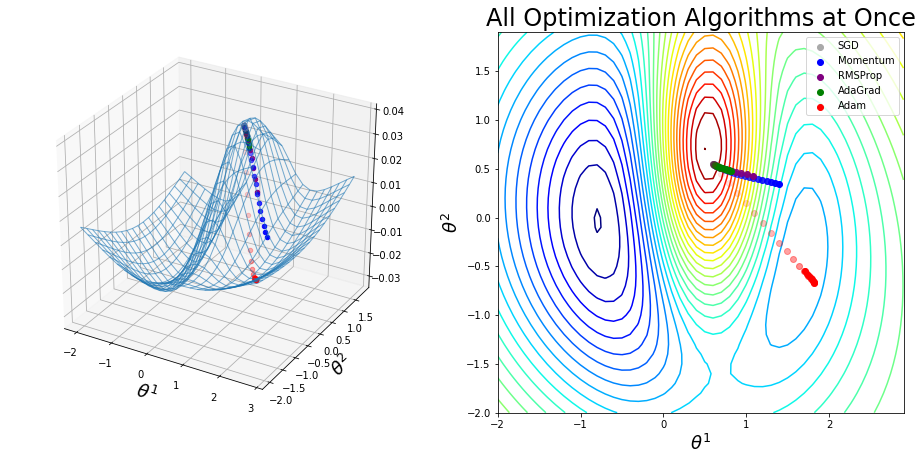

In [79]:
pylab.clf()
fig = pylab.figure(figsize=(16, 7))
plot_skip_steps =2
epsilon = 0.0
ax1 = fig.add_subplot(121,projection='3d')
ax2 = fig.add_subplot(122)


ax1.plot_wireframe(X_lowres, Y_lowres, Z_lowres, linewidth=1, cmap=cm.jet, zorder=1, alpha=0.6)
ax2.contour(X_hires, Y_hires, Z_hires, 32,  zorder=1, cmap=cm.jet)
ax2.autoscale(False) # To avoid that the scatter changes limits

# Plotting SGD
for idx, (x,y,z) in enumerate(zip(opt_sgd_points_x, opt_sgd_points_y, opt_sgd_points_z)):
    if (idx)%plot_skip_steps!=0:
        continue
        
    if idx != len(opt_sgd_points_x)-1:
        ax1.scatter(x,y,z + epsilon , color='darkgray', alpha=max(0.1,idx*1.0/n_steps), zorder=100)
        ax2.scatter(x,y, alpha=max(0.1,idx*1.0/n_steps) , color='darkgray')
    else:
        ax1.scatter(x,y,z + epsilon , color='darkgray', alpha=max(0.1,idx*1.0/n_steps), label='SGD', zorder=100)
        ax2.scatter(x,y , color='darkgray', alpha=max(0.1,idx*1.0/n_steps),  label='SGD')

# Plotting Momentum
for idx, (x,y,z) in enumerate(zip(opt_mom_points_x, opt_mom_points_y, opt_mom_points_z)):
    if (idx)%plot_skip_steps!=0:
        continue
        
    if idx != len(opt_mom_points_x)-1:
        ax1.scatter(x,y, z, color='b', alpha=max(0.1,idx*1.0/n_steps), zorder=100)
        ax2.scatter(x,y, color='b', alpha=max(0.1,idx*1.0/n_steps))
    else:
        ax1.scatter(x,y,z + epsilon , color='b', alpha=max(0.1,idx*1.0/n_steps), label='Momentum', zorder=100)
        ax2.scatter(x,y, color='b', alpha=max(0.1,idx*1.0/n_steps), label='Momentum')

# Plotting RMSProp
for idx, (x,y,z) in enumerate(zip(opt_rms_points_x, opt_rms_points_y, opt_rms_points_z)):
    if (idx)%plot_skip_steps!=0:
        continue
        
    if idx != len(opt_rms_points_x)-1:
        ax1.scatter(x,y,z + epsilon , color='purple', alpha=max(0.1,idx*1.0/n_steps), zorder=100)
        ax2.scatter(x,y , color='purple', alpha=max(0.1,idx*1.0/n_steps))
    else:
        ax1.scatter(x,y,z + epsilon , color='purple', alpha=max(0.1,idx*1.0/n_steps), label='RMSProp', zorder=100)
        ax2.scatter(x,y, color='purple', alpha=max(0.1,idx*1.0/n_steps), label='RMSProp')

# Plotting AdaGrad
for idx, (x,y,z) in enumerate(zip(opt_ada_points_x, opt_ada_points_y, opt_ada_points_z)):
    if (idx)%plot_skip_steps!=0:
        continue
        
    if idx != len(opt_ada_points_x)-1:
        ax1.scatter(x,y,z + epsilon , color='g', alpha=max(0.1,idx*1.0/n_steps), zorder=100)
        ax2.scatter(x,y , color='g', alpha=max(0.1,idx*1.0/n_steps), zorder=100)
    else:
        ax1.scatter(x,y,z + epsilon , color='g', alpha=max(0.1,idx*1.0/n_steps), label='AdaGrad', zorder=100)
        ax2.scatter(x,y,color='g', alpha=max(0.1,idx*1.0/n_steps), label='AdaGrad', zorder=100)
        
# Plotting Adam
for idx, (x,y,z) in enumerate(zip(opt_adam_points_x, opt_adam_points_y, opt_adam_points_z)):
    if (idx)%plot_skip_steps!=0:
        continue
        
    if idx != len(opt_adam_points_x)-1:
        ax1.scatter(x,y,z + epsilon , color='r', alpha=max(0.1,idx*1.0/n_steps), zorder=100)
        ax2.scatter(x,y, color='r', alpha=max(0.1,idx*1.0/n_steps), zorder=100)
    else:
        ax1.scatter(x,y,z + epsilon , color='r', alpha=max(0.1,idx*1.0/n_steps), label='Adam', zorder=100)
        ax2.scatter(x,y , color='r', alpha=max(0.1,idx*1.0/n_steps), label='Adam', zorder=100)

ax1.set_xlabel(r'$\theta^1$',fontsize=18)
ax1.set_ylabel(r'$\theta^2$',fontsize=18)
ax2.set_xlabel(r'$\theta^1$',fontsize=18)
ax2.set_ylabel(r'$\theta^2$',fontsize=18)

pylab.title('All Optimization Algorithms at Once', fontsize=24)
pylab.legend()

pylab.savefig('all_sgd.png')
pylab.show()